Epoch 1/10
938/938 [==============================] - 62s 65ms/step - loss: 0.3237 - accuracy: 0.9007
Epoch 2/10
938/938 [==============================] - 56s 60ms/step - loss: 0.1048 - accuracy: 0.9701
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0769 - accuracy: 0.9786
Epoch 4/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0598 - accuracy: 0.9829
Epoch 5/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0518 - accuracy: 0.9852
Epoch 6/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0421 - accuracy: 0.9880
Epoch 7/10
938/938 [==============================] - 60s 64ms/step - loss: 0.0347 - accuracy: 0.9901
Epoch 8/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0308 - accuracy: 0.9909
Epoch 9/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0310

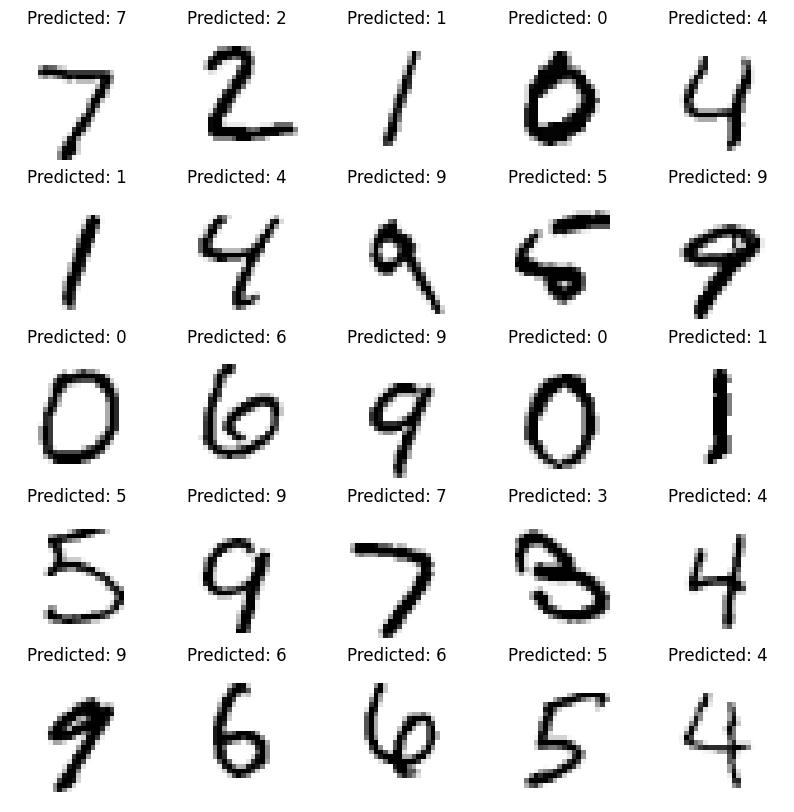

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10, batch_size=64) 

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


predictions = model.predict(test_images)


num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Predicted: ' + str(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()
